In [53]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import regex as re 
import seaborn as sns

In [54]:
pd.set_option("display.max_colwidth", None)

In [55]:
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DATA_PATH = os.path.join(PRJ_ROOT_DIR, 'data/tabular/integrate/lda')
NOTE_DIR = os.path.join(PRJ_ROOT_DIR, 'notebooks')
VIS_PATH = os.path.join(NOTE_DIR, 'images/03.4_eda_on_integrated_data')

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(VIS_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Load data

In [57]:
df_matches = pd.read_csv(os.path.join(ROOT_DATA_PATH, "matches.csv"))
df_id = pd.read_csv(os.path.join(ROOT_DATA_PATH, "matches_with_playerid.csv"))
df_players = pd.read_csv(os.path.join(ROOT_DATA_PATH, "players.csv"))

In [58]:
# add away_result column
df_id['away_result'] = np.where(df_id['home_result'] == 'win', 'lose',
                             np.where(df_id['home_result'] == 'lose', 'win', 'draw'))

In [59]:
df_matches 

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
0,lose,2019/20,1.286584,7.035507,1.259102,-2.931753,0.062317,-1.631287,-2.707726,-0.607117,...,-100.000000,2.247774,-0.737455,-1.588368,2.059278,-1.289581,-0.214014,-0.025312,-0.479952,1.471758
1,win,2019/20,0.771112,2.864098,0.136227,-3.137167,-0.522932,-0.568367,-2.725580,-0.359102,...,-0.780148,1.990417,-0.727778,-2.796785,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
2,win,2019/20,1.081934,6.476357,1.060024,-3.610155,-0.617447,3.083772,-3.131397,-0.594232,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3,win,2019/20,1.270547,6.125389,0.866984,-3.375562,-0.538387,-1.682440,-3.103326,0.157253,...,-100.000000,1.980681,-0.619516,-1.541976,1.383543,-0.932270,0.070167,1.083550,-0.641444,1.485667
4,win,2019/20,1.446074,7.081245,1.423544,-3.169787,-0.700700,0.751141,-2.441979,-0.588787,...,0.878456,2.518209,-0.529214,-3.471708,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,2021/22,1.096860,7.664981,1.030113,-3.110702,-0.419559,0.173017,-2.291735,-0.189176,...,-1.604356,2.068204,-0.881599,-1.226240,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
1136,win,2021/22,0.334105,3.979458,0.309591,-3.123301,-0.053396,-0.840144,-2.975121,-0.110232,...,-0.690187,2.041043,-1.006175,-3.622045,1.180349,-0.571187,-1.254287,-100.000000,-100.000000,-100.000000
1137,lose,2021/22,0.935548,6.279345,0.752885,-2.725118,-0.222117,-0.084760,-2.359624,-0.233390,...,-100.000000,2.089158,-0.930276,-3.477027,1.293585,-1.183664,2.243419,1.281312,-0.590887,0.282728
1138,win,2021/22,1.182444,7.042481,0.819191,-2.873911,-0.669088,0.491676,-2.763736,-0.132193,...,0.762411,1.627330,-1.141200,-1.083433,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [60]:
df_id

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26,away_result
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,57531.0,86934.0,...,205651,2.059278,-1.289581,-0.214014,103955,-0.025312,-0.479952,1.471758,103025,win
1,37915.0,55605.0,173904.0,158534.0,38290.0,-1.0,62974.0,231372.0,157668.0,45268.0,...,213345,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
2,116535.0,169187.0,122798.0,97032.0,171287.0,-1.0,56979.0,116643.0,41733.0,-1.0,...,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
3,98747.0,17761.0,51927.0,68983.0,39487.0,-1.0,433154.0,60551.0,40145.0,60586.0,...,200439,1.383543,-0.932270,0.070167,84939,1.083550,-0.641444,1.485667,83283,lose
4,51940.0,214590.0,95658.0,184667.0,106760.0,-1.0,109322.0,156689.0,176297.0,195851.0,...,173879,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,37096.0,55459.0,164555.0,60232.0,219924.0,-1.0,180151.0,86934.0,178186.0,204480.0,...,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
1136,40383.0,171771.0,450527.0,212721.0,-1.0,-1.0,203389.0,240143.0,78056.0,244560.0,...,144485,1.180349,-0.571187,-1.254287,446008,-100.000000,-100.000000,-100.000000,-1,lose
1137,51940.0,214590.0,90152.0,106760.0,76359.0,-1.0,195851.0,62398.0,209243.0,220688.0,...,102057,1.293585,-1.183664,2.243419,200600,1.281312,-0.590887,0.282728,222564,win
1138,116535.0,60914.0,122798.0,97032.0,169187.0,-1.0,206915.0,61558.0,116643.0,-1.0,...,200617,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose


# 2. EDA

### Season 2019/2020

In [61]:
df_1920 = df_id[df_id['season']=='2019/20']
df_1920

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,id_24,0_25,1_25,2_25,id_25,0_26,1_26,2_26,id_26,away_result
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,57531.0,86934.0,...,205651,2.059278,-1.289581,-0.214014,103955,-0.025312,-0.479952,1.471758,103025,win
1,37915.0,55605.0,173904.0,158534.0,38290.0,-1.0,62974.0,231372.0,157668.0,45268.0,...,213345,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
2,116535.0,169187.0,122798.0,97032.0,171287.0,-1.0,56979.0,116643.0,41733.0,-1.0,...,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
3,98747.0,17761.0,51927.0,68983.0,39487.0,-1.0,433154.0,60551.0,40145.0,60586.0,...,200439,1.383543,-0.932270,0.070167,84939,1.083550,-0.641444,1.485667,83283,lose
4,51940.0,214590.0,95658.0,184667.0,106760.0,-1.0,109322.0,156689.0,176297.0,195851.0,...,173879,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,121160.0,121145.0,58621.0,146941.0,432656.0,-1.0,220566.0,61366.0,20664.0,-1.0,...,57127,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,lose
376,67089.0,57145.0,109528.0,38290.0,-1.0,-1.0,56983.0,50232.0,179018.0,116543.0,...,152760,1.174299,-1.113883,1.427079,81880,-0.078340,-2.250698,1.454779,157882,win
377,58376.0,88900.0,93100.0,40146.0,158534.0,-1.0,91047.0,78056.0,83283.0,101178.0,...,18867,1.435788,-0.799341,-1.009852,169432,-100.000000,-100.000000,-100.000000,-1,lose
378,37096.0,219924.0,40669.0,81012.0,222018.0,-1.0,204480.0,217593.0,18073.0,215439.0,...,217487,-100.000000,-100.000000,-100.000000,-1,-100.000000,-100.000000,-100.000000,-1,draw


In [62]:
# get the id of all players played in the season
df_1920_ids = df_1920.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_1920_ids:
    ids_unique.append(df_1920_ids[col].unique())
    ids.append(df_1920_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  470


Mean frequency:  17.74468085106383
Max matches played by a player:  38
Min matches played by a player:  1


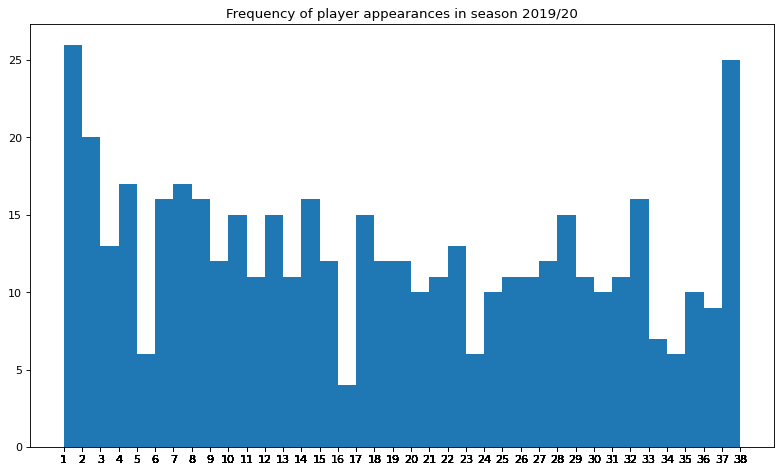

Saving figure freq_appeances_1920


<Figure size 432x288 with 0 Axes>

In [63]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_1920 = dict(tup) # dict of number of appearances of players in the 19/20 season
ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)
plt.title("Frequency of player appearances in season 2019/20")
plt.show()
save_fig("freq_appeances_1920")

Saving figure freq_appearances_1920_boxplot


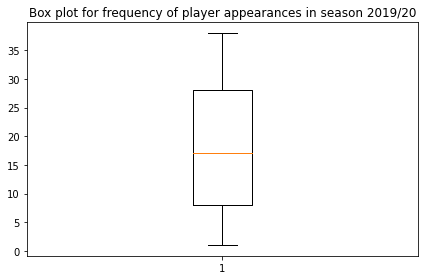

In [64]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2019/20")
save_fig("freq_appearances_1920_boxplot")

**NOTE:** The *2019/20* season have `470` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `18 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 18 appearances in the *2019/20* season.

### Season 2020/2021

In [65]:
df_2021 = df_id[df_id['season']=='2020/21']
df_2021

# get the id of all players played in the season
df_2021_ids = df_2021.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_2021_ids:
    ids_unique.append(df_2021_ids[col].unique())
    ids.append(df_2021_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  472


Mean frequency:  17.658898305084747
Max matches played by a player:  38
Min matches played by a player:  1


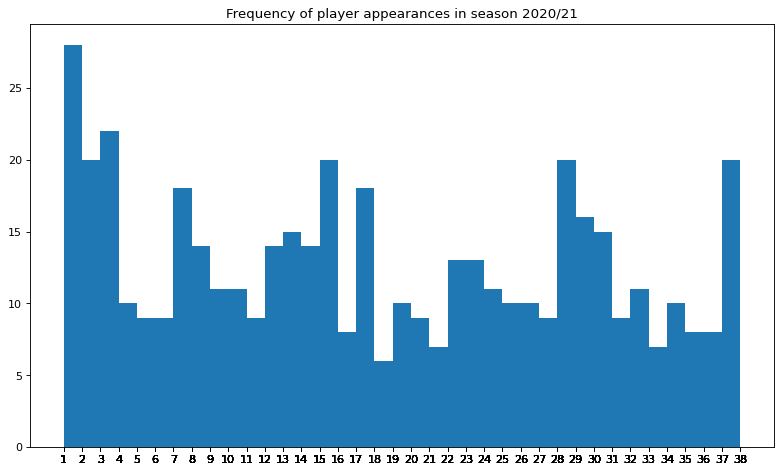

Saving figure freq_appeances_2021


<Figure size 432x288 with 0 Axes>

In [66]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_2021 = dict(tup) # dict of number of appearances of players in the 20/21 season

ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)

plt.title("Frequency of player appearances in season 2020/21")
plt.show()
save_fig("freq_appeances_2021")

Saving figure freq_appearances_2021_boxplot


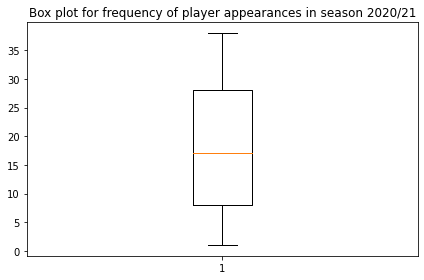

In [67]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2020/21")
save_fig("freq_appearances_2021_boxplot")

**NOTE:** The *2020/21* season have `472` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `19 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 19 appearances in the *2020/21* season.

### Season 2021/22

In [68]:
df_2122 = df_id[df_id['season']=='2021/22']
df_2122

# get the id of all players played in the season
df_2122_ids = df_2122.loc[:,['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26']]
ids = list()
ids_unique = list()
for col in df_2122_ids:
    ids_unique.append(df_2122_ids[col].unique())
    ids.append(df_2122_ids[col])
ids_unique = [i for sub in ids_unique for i in sub if i!= -1]
ids = [i for sub in ids for i in sub if i!=-1]
ids_unique = list(set(ids_unique))
print("Total number of players showed up in the season: ", len(ids_unique))

Total number of players showed up in the season:  484


Mean frequency:  17.233471074380166
Max matches played by a player:  38
Min matches played by a player:  1


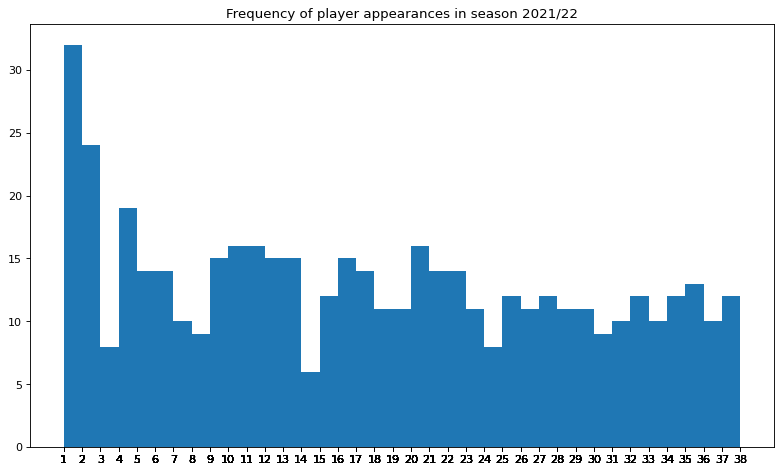

<Figure size 432x288 with 0 Axes>

In [69]:
# get frequency of players occurances
tup = list(Counter(ids).items())
appear_2122 = dict(tup) # dict of number of appearances of players in the 21/22 season

ind = [i[0] for i in tup]
freq = np.array([i[1] for i in tup])
print("Mean frequency: ", freq.mean())
print("Max matches played by a player: ", freq.max())
print("Min matches played by a player: ", freq.min())

plt.figure(figsize=(12, 7), dpi=80)
plt.hist(freq, bins=np.arange(freq.min(), freq.max()+1))
plt.xticks(freq)

plt.title("Frequency of player appearances in season 2021/22")
plt.show()
plt.savefig(os.path.join(VIS_PATH, "freq_appeances_2122"))

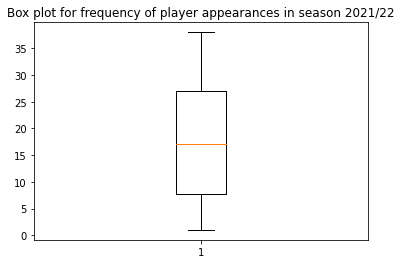

In [70]:
plt.boxplot(freq)
plt.title("Box plot for frequency of player appearances in season 2021/22")
plt.savefig(os.path.join(VIS_PATH, "freq_appearances_2122_boxplot"))

**NOTE:** The *2021/22* season have `484` different players, where a player can appear in upto 38 matches and at least 0 match. For this dataset, we only consider player that appear at least one time.

Statiscally (proved in the Report), a player must appear in at least `19 matches` to have a statistically significant comparison at an 80% confidence level with an error margin of 5%.
Therefore, to find the player with highest win/lose/draw ratio, we only consider players with over 19 appearances in the *2021/22* season.

### Players that has highest **home** win/lose/draw ratio 

#### Season 2019/20

In [192]:
df_players_1920 = df_players[df_players['season']=='2019/20']
df_players_2021 = df_players[df_players['season']=='2020/21']
df_players_2122 = df_players[df_players['season']=='2021/22']

In [193]:
def get_name_by_id(df, id):
    return df['name'][df['id']==id]

In [156]:
df_1920_home_result = df_1920.loc[:, ['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'home_result']]
df_1920_away_result = df_1920.loc[:, ['id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'away_result']]

In [87]:
ids_1920 = df_players['id'][df_players['season']=='2019/20'].unique()

In [154]:
ids_1920 = [int(i) for i in ids_1920]

In [157]:
ids_1920_significant = [i for i in ids_1920 if i in appear_1920.keys() and appear_1920[i] >= 18] #only consider players that played more than 18 matches, for significant comparison

In [158]:
def create_df_on_home(df_home, id_list):
    # count total matches played

    appear_dict = {}
    win_dict = {}
    lose_dict = {}
    draw_dict = {}
    for id in id_list:
        match_played = (df_home.eq(id)).sum().sum()
        appear_dict[id] = match_played

        win_count = sum((df_home[df_home['home_result'] == 'win'] == id).any(axis=1))
        win_dict[id] = win_count

        lose_count = sum((df_home[df_home['home_result'] == 'lose'] == id).any(axis=1))
        lose_dict[id] = lose_count

        draw_count = sum((df_home[df_home['home_result'] == 'win'] == id).any(axis=1))
        draw_dict[id] = draw_count


    # Convert dictionaries to Series
    ser1 = pd.Series(win_dict, name='home_win_count')
    ser2 = pd.Series(lose_dict, name='home_lose_count')
    ser3 = pd.Series(draw_dict, name='home_draw_count')
    ser4 = pd.Series(appear_dict, name='home_played')


    # Concatenate the two Series and reset the index
    df = pd.concat([ser1, ser2, ser3, ser4], axis=1).reset_index()
    df.columns = ['id', 'home_win_count', 'home_lose_count', 'home_draw_count', 'home_played']
        
    return df


def create_df_on_away(df_away, id_list):
    win_dict = {}
    lose_dict = {}
    draw_dict = {}
    appear_dict = {}
    for id in id_list:
        match_played = (df_away.eq(id)).sum().sum()
        appear_dict[id] = match_played

        win_count = sum((df_away[df_away['away_result'] == 'win'] == id).any(axis=1))
        win_dict[id] = win_count

        lose_count = sum((df_away[df_away['away_result'] == 'lose'] == id).any(axis=1))
        lose_dict[id] = lose_count

        draw_count = sum((df_away[df_away['away_result'] == 'win'] == id).any(axis=1))
        draw_dict[id] = draw_count

    # Convert dictionaries to Series
    ser1 = pd.Series(win_dict, name='away_win_count')
    ser2 = pd.Series(lose_dict, name='away_lose_count')
    ser3 = pd.Series(draw_dict, name='away_draw_count')
    ser4 = pd.Series(appear_dict, name="away_played")


    # Concatenate the two Series and reset the index
    df = pd.concat([ser1, ser2, ser3, ser4], axis=1).reset_index()
    df.columns = ['id', 'away_win_count', 'away_lose_count', 'away_draw_count', 'away_played']
        
    return df

In [159]:
def create_id_result_df(df_home, df_away, ids_1920_significant):
    df_home = create_df_on_home(df_home, ids_1920_significant)
    df_away = create_df_on_away(df_away, ids_1920_significant)

    df = df_home.merge(df_away, on='id')
    return df

In [164]:
id_result_1920 = create_id_result_df(df_1920_home_result, df_1920_away_result, ids_1920_significant)

In [165]:
id_result_1920

,id,home_win_count,home_lose_count,home_draw_count,home_played,away_win_count,away_lose_count,away_draw_count,away_played
0,110735,4,5,4,14,3,7,3,17
1,116216,2,6,2,14,1,3,1,8
2,148508,5,3,5,8,1,7,1,12
3,18665,3,9,3,14,1,10,1,14
4,63426,10,6,10,19,4,6,4,19
...,...,...,...,...,...,...,...,...,...
223,173807,2,2,2,10,4,7,4,13
224,103955,9,2,9,13,9,7,9,17
225,56979,11,0,11,11,12,1,12,15
226,102057,8,4,8,19,7,4,7,18


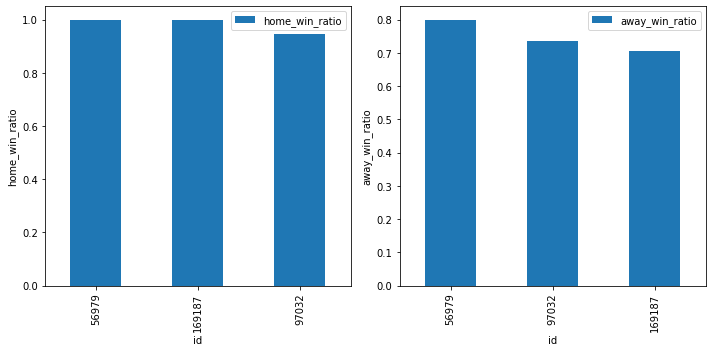

Saving figure home_away_win_ratio_1920


<Figure size 432x288 with 0 Axes>

In [176]:
# Calculate home win ratio
id_result_1920['home_win_ratio'] = id_result_1920.apply(lambda x: x['home_win_count'] / x['home_played'] if x['home_played'] != 0 else 0, axis=1)

# Sort by home win ratio
id_result_1920.sort_values(by='home_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_1920 = id_result_1920.head(3)
# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

id_result_1920.plot(kind='bar', x='id', y='home_win_ratio', legend=True, ax=ax[0])
ax[0].set_xlabel("id")
ax[0].set_ylabel("home_win_ratio")

# Calculate away win ratio
id_result_1920['away_win_ratio'] = id_result_1920.apply(lambda x: x['away_win_count'] / x['away_played'] if x['away_played'] != 0 else 0, axis=1)

# Sort by away win ratio
id_result_1920.sort_values(by='away_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_1920 = id_result_1920.head(3)

id_result_1920.plot(kind='bar', x='id', y='away_win_ratio', legend=True, ax=ax[1])
ax[1].set_xlabel("id")
ax[1].set_ylabel("away_win_ratio")

plt.tight_layout()
plt.show()
save_fig("home_away_win_ratio_1920")

In [194]:
print("Home win ratio ranking in season 2019/20")
print(f'1. {get_name_by_id(df_players_1920, 56979)}')
print(f'2. {get_name_by_id(df_players_1920, 169187)}')
print(f'3. {get_name_by_id(df_players_1920, 97032)}')

print('')
print("Away win ratio ranking in season 2019/20")
print(f'1. {get_name_by_id(df_players_1920, 56979)}')
print(f'2. {get_name_by_id(df_players_1920, 97032)}')
print(f'3. {get_name_by_id(df_players_1920, 169187)}')

Home win ratio ranking in season 2019/20
1. 3915    Jordan Henderson
Name: name, dtype: object
2. 2398    Trent Alexander-Arnold
Name: name, dtype: object
3. 2909    Virgil van Dijk
Name: name, dtype: object

Away win ratio ranking in season 2019/20
1. 3915    Jordan Henderson
Name: name, dtype: object
2. 2909    Virgil van Dijk
Name: name, dtype: object
3. 2398    Trent Alexander-Arnold
Name: name, dtype: object


#### Season 2020/21

In [169]:
df_2021_home_result = df_2021.loc[:, ['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'home_result']]
df_2021_away_result = df_2021.loc[:, ['id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'away_result']]

In [170]:
ids_2021 = df_players['id'][df_players['season']=='2020/21'].unique()

In [171]:
ids_2021 = [int(i) for i in ids_2021]

In [172]:
ids_2021_significant = [i for i in ids_2021 if i in appear_2021.keys() and appear_2021[i] >= 19]

In [178]:
id_result_2021 = create_id_result_df(df_2021_home_result, df_2021_away_result, ids_2021_significant)

In [179]:
id_result_2021

,id,home_win_count,home_lose_count,home_draw_count,home_played,away_win_count,away_lose_count,away_draw_count,away_played
0,444463,7,7,7,15,7,3,7,12
1,165153,9,3,9,14,8,4,8,15
2,178301,7,8,7,18,9,7,9,19
3,55494,4,5,4,12,3,7,3,13
4,111478,3,4,3,15,2,6,2,10
...,...,...,...,...,...,...,...,...,...
211,55459,10,4,10,18,9,5,9,18
212,75115,4,6,4,12,4,5,4,11
213,151589,5,6,5,14,5,5,5,14
214,58621,9,1,9,11,7,1,7,11


/var/folders/pr/blnkzjbd0gsc2w67v8dbtyqc0000gn/T/ipykernel_5954/1020069351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_result_2021['away_win_ratio'] = id_result_2021.apply(lambda x: x['away_win_count'] / x['away_played'] if x['away_played'] != 0 else 0, axis=1)
/Users/lggvu/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


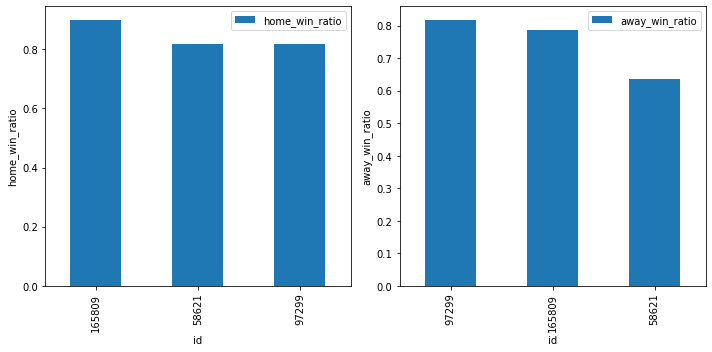

Saving figure home_away_win_ratio_2021


<Figure size 432x288 with 0 Axes>

In [180]:
# Calculate home win ratio
id_result_2021['home_win_ratio'] = id_result_2021.apply(lambda x: x['home_win_count'] / x['home_played'] if x['home_played'] != 0 else 0, axis=1)

# Sort by home win ratio
id_result_2021.sort_values(by='home_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_2021 = id_result_2021.head(3)
# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

id_result_2021.plot(kind='bar', x='id', y='home_win_ratio', legend=True, ax=ax[0])
ax[0].set_xlabel("id")
ax[0].set_ylabel("home_win_ratio")

# Calculate away win ratio
id_result_2021['away_win_ratio'] = id_result_2021.apply(lambda x: x['away_win_count'] / x['away_played'] if x['away_played'] != 0 else 0, axis=1)

# Sort by away win ratio
id_result_2021.sort_values(by='away_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_2021 = id_result_2021.head(3)

id_result_2021.plot(kind='bar', x='id', y='away_win_ratio', legend=True, ax=ax[1])
ax[1].set_xlabel("id")
ax[1].set_ylabel("away_win_ratio")

plt.tight_layout()
plt.show()
save_fig("home_away_win_ratio_2021")

In [196]:
print("Home win ratio ranking in season 2020/21")
print(f'1. {get_name_by_id(df_players_1920, 165809)}')
print(f'2. {get_name_by_id(df_players_1920, 58621)}')
print(f'3. {get_name_by_id(df_players_1920, 97299)}')

print('')
print("Away win ratio ranking in season 2020/21")
print(f'1. {get_name_by_id(df_players_1920, 97299)}')
print(f'2. {get_name_by_id(df_players_1920, 165809)}')
print(f'3. {get_name_by_id(df_players_1920, 58621)}')

Home win ratio ranking in season 2020/21
1. 3604    Bernardo Silva
Name: name, dtype: object
2. 2642    Kyle Walker
Name: name, dtype: object
3. 2182    John Stones
Name: name, dtype: object

Away win ratio ranking in season 2020/21
1. 2182    John Stones
Name: name, dtype: object
2. 3604    Bernardo Silva
Name: name, dtype: object
3. 2642    Kyle Walker
Name: name, dtype: object


#### Season 2021/22

In [185]:
df_2122_home_result = df_2122.loc[:, ['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'home_result']]
df_2122_away_result = df_2122.loc[:, ['id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'away_result']]

In [186]:
ids_2122 = df_players['id'][df_players['season']=='2021/22'].unique()

In [187]:
ids_2122 = [int(i) for i in ids_2122]

In [188]:
ids_2122_significant = [i for i in ids_2122 if i in appear_2122.keys() and appear_2122[i] >= 18] #only consider players that played more than 18 matches, for significant comparison

In [189]:
id_result_2122 = create_id_result_df(df_2122_home_result, df_2122_away_result, ids_2122_significant)

In [190]:
id_result_2122

,id,home_win_count,home_lose_count,home_draw_count,home_played,away_win_count,away_lose_count,away_draw_count,away_played
0,90152,4,2,4,11,4,2,4,9
1,144485,6,8,6,16,6,7,6,16
2,223723,8,1,8,10,4,5,4,10
3,162651,0,7,0,8,2,6,2,11
4,209243,7,1,7,10,3,5,3,10
...,...,...,...,...,...,...,...,...,...
225,174874,6,3,6,16,4,5,4,15
226,66588,2,7,2,12,3,7,3,14
227,232185,2,7,2,10,3,7,3,11
228,151589,3,5,3,10,5,4,5,11


/var/folders/pr/blnkzjbd0gsc2w67v8dbtyqc0000gn/T/ipykernel_5954/2681813721.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_result_2122['away_win_ratio'] = id_result_2122.apply(lambda x: x['away_win_count'] / x['away_played'] if x['away_played'] != 0 else 0, axis=1)
/Users/lggvu/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


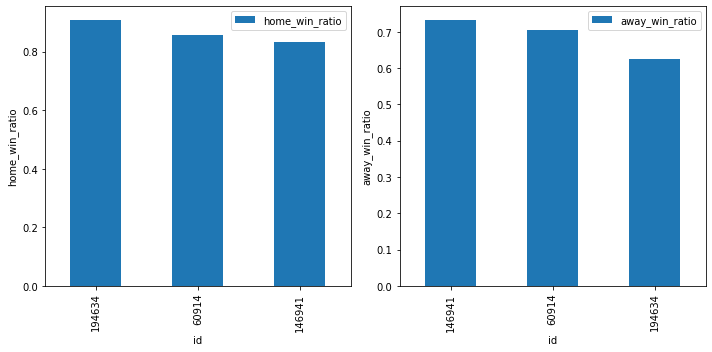

Saving figure home_away_win_ratio_2122


<Figure size 432x288 with 0 Axes>

In [191]:
# Calculate home win ratio
id_result_2122['home_win_ratio'] = id_result_2122.apply(lambda x: x['home_win_count'] / x['home_played'] if x['home_played'] != 0 else 0, axis=1)

# Sort by home win ratio
id_result_2122.sort_values(by='home_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_2122 = id_result_2122.head(3)
# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

id_result_2122.plot(kind='bar', x='id', y='home_win_ratio', legend=True, ax=ax[0])
ax[0].set_xlabel("id")
ax[0].set_ylabel("home_win_ratio")

# Calculate away win ratio
id_result_2122['away_win_ratio'] = id_result_2122.apply(lambda x: x['away_win_count'] / x['away_played'] if x['away_played'] != 0 else 0, axis=1)

# Sort by away win ratio
id_result_2122.sort_values(by='away_win_ratio', ascending=False, inplace=True)

# Select the first 3 players
id_result_2122 = id_result_2122.head(3)

id_result_2122.plot(kind='bar', x='id', y='away_win_ratio', legend=True, ax=ax[1])
ax[1].set_xlabel("id")
ax[1].set_ylabel("away_win_ratio")

plt.tight_layout()
plt.show()
save_fig("home_away_win_ratio_2122")

In [198]:
print("Home win ratio ranking in season 2021/22")
print(f'1. {get_name_by_id(df_players_1920, 194634)}')
print(f'2. {get_name_by_id(df_players_1920, 60914)}')
print(f'3. {get_name_by_id(df_players_1920, 146941)}')

print('')
print("Away win ratio ranking in season 2021/22")
print(f'1. {get_name_by_id(df_players_1920, 146941)}')
print(f'2. {get_name_by_id(df_players_1920, 60914)}')
print(f'3. {get_name_by_id(df_players_1920, 194634)}')

Home win ratio ranking in season 2021/22
1. 2387    Diogo Jota
Name: name, dtype: object
2. 2246    Joël Matip
Name: name, dtype: object
3. 2145    Aymeric Laporte
Name: name, dtype: object

Away win ratio ranking in season 2021/22
1. 2145    Aymeric Laporte
Name: name, dtype: object
2. 2246    Joël Matip
Name: name, dtype: object
3. 2387    Diogo Jota
Name: name, dtype: object


### Number of appearances by positions

#### Season 19/20

In [82]:
# 2019/20
from collections import defaultdict

def pos_id_and_id_pos(appear_season, df_season):
    id_pos = {}
    for i in appear_season.keys():
        id_pos[i] = df_season.columns[df_season.isin([i]).any()][0]
    id_pos = {k:re.search(r"/(.*?)_", id_pos[k]).group(1) for k in id_pos} # for example, 30900: gk, 30000: fw

    pos_id = defaultdict(list)
    for key, value in id_pos.items():
        pos_id[value].append(key)
    pos_id = dict(pos_id)  # for example, 'gk': [100, 200], 'mf': [300,400]

    return id_pos, pos_id

In [83]:
_, pos_id_1920 = pos_id_and_id_pos(appear_1920, df_1920)

In [84]:
def appearances_by_pos(pos, pos_id, appear_season):
    pos_appearances = {}
    for id in pos_id[pos]:
        pos_appearances[id] = appear_season[id] 
    return pos_appearances

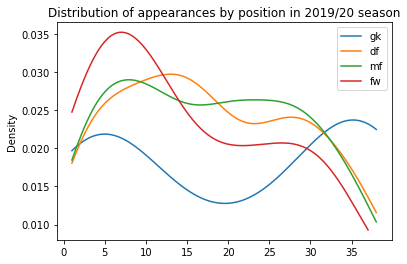

<Figure size 432x288 with 0 Axes>

In [85]:
data_1920 = {'gk': list(appearances_by_pos('gk', pos_id_1920,appear_1920).values()), 
        'df': list(appearances_by_pos('df', pos_id_1920, appear_1920).values()),
        'mf': list(appearances_by_pos('mf', pos_id_1920, appear_1920).values()),
        'fw': list(appearances_by_pos('fw', pos_id_1920, appear_1920).values())}

for key in data_1920:
    sns.kdeplot(data_1920[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2019/20 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_1920.png'))

#### Season 20/21

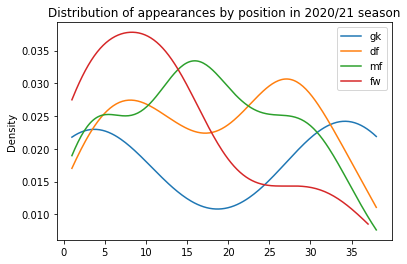

<Figure size 432x288 with 0 Axes>

In [86]:
_, pos_id_2021 = pos_id_and_id_pos(appear_2021, df_2021)

data_2021 = {'gk': list(appearances_by_pos('gk', pos_id_2021, appear_2021).values()), 
        'df': list(appearances_by_pos('df', pos_id_2021, appear_2021).values()),
        'mf': list(appearances_by_pos('mf', pos_id_2021, appear_2021).values()),
        'fw': list(appearances_by_pos('fw', pos_id_2021, appear_2021).values())}

for key in data_2021:
    sns.kdeplot(data_2021[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2020/21 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_2021.png'))

#### Season 21/22

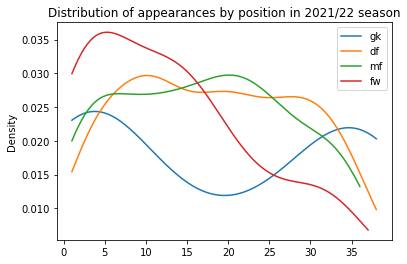

<Figure size 432x288 with 0 Axes>

In [87]:
_, pos_id_2122 = pos_id_and_id_pos(appear_2122, df_2122)

data_2122 = {'gk': list(appearances_by_pos('gk', pos_id_2122, appear_2122).values()), 
        'df': list(appearances_by_pos('df', pos_id_2122, appear_2122).values()),
        'mf': list(appearances_by_pos('mf', pos_id_2122, appear_2122).values()),
        'fw': list(appearances_by_pos('fw', pos_id_2122, appear_2122).values())}

for key in data_2122:
    sns.kdeplot(data_2122[key], label=key, cut=0)

plt.legend()
plt.title("Distribution of appearances by position in 2021/22 season")
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'appearance_dist_by_pos_2122.png'))

**NOTE:** It is clearly shown that goalkeepers tend to attend more matches than any other positions. Mostly, goalkeepers attend most of the club's matches throughout the seasons.

## Most common lineups

### All three seasons

In [88]:
# yield lineup from the df
df_lineups = df_id

df_lineups['num_df_home'] = (df_lineups.loc[: ,['home/df_0','home/df_1','home/df_2','home/df_3','home/df_4']] != -1.0).sum(axis=1)
df_lineups['num_df_away'] = (df_lineups.loc[: ,['away/df_0','away/df_1','away/df_2','away/df_3']] != -1.0).sum(axis=1)
df_lineups['num_mf_home'] = (df_lineups.loc[: ,['home/mf_0','home/mf_1','home/mf_2','home/mf_3','home/mf_4']] != -1.0).sum(axis=1)
df_lineups['num_mf_away'] = (df_lineups.loc[: ,['away/mf_0','away/mf_1','away/mf_2','away/mf_3','away/mf_4']] != -1.0).sum(axis=1)
df_lineups['num_fw_home'] = (df_lineups.loc[: ,['home/fw_0','home/fw_1','home/fw_2']] != -1.0).sum(axis=1)
df_lineups['num_fw_away'] = (df_lineups.loc[: ,['away/fw_0','away/fw_1','away/fw_2']] != -1.0).sum(axis=1)

# ['home/gk_0','home/df_0','home/df_1','home/df_2','home/df_3','home/df_4','home/mf_0','home/mf_1','home/mf_2','home/mf_3','home/mf_4','home/fw_0','home/fw_1','home/fw_2','away/gk_0','away/df_0','away/df_1','away/df_2','away/df_3','away/mf_0','away/mf_1','away/mf_2','away/mf_3','away/mf_4','away/fw_0','away/fw_1','away/fw_2']

df_lineups["home/lineup"] = df_lineups["num_df_home"].astype(str) + "-" + df_lineups["num_mf_home"].astype(str) + "-" + df_lineups["num_fw_home"].astype(str)
df_lineups["away/lineup"] = df_lineups["num_df_away"].astype(str) + "-" + df_lineups["num_mf_away"].astype(str) + "-" + df_lineups["num_fw_away"].astype(str)

In [89]:
print("Number of distinct lineups used by home teams: ", df_lineups['home/lineup'].nunique())
print("Number of distinct lineups used by away teams: ", df_lineups['away/lineup'].nunique())

Number of distinct lineups used by home teams:  7
Number of distinct lineups used by away teams:  7


In [90]:
print("Home lineups: ", df_lineups['home/lineup'].unique())
print("Away lineups: ", df_lineups['away/lineup'].unique())

Home lineups:  ['4-5-1' '4-4-2' '4-3-3' '3-4-3' '3-5-2' '5-4-1' '5-3-2']
Away lineups:  ['4-3-3' '4-5-1' '3-4-3' '3-5-2' '4-4-2' '4-4-1' '4-3-2']


In [91]:
print("Most common lineups used by home teams: ", df_lineups['home/lineup'].mode().values[0])
print("Most common lineups used by away teams: ", df_lineups['away/lineup'].mode().values[0])

Most common lineups used by home teams:  4-5-1
Most common lineups used by away teams:  4-5-1


In [92]:
# Get the count of each unique value in the 'home/lineup' column
home_counts = df_lineups['home/lineup'].value_counts().reset_index()

# Rename the columns for clarity
home_counts.columns = ['lineup', 'occurrences']

# Repeat the process for the 'away/lineup' column
away_counts = df_lineups['away/lineup'].value_counts().reset_index()
away_counts.columns = ['lineup', 'occurrences']

# Combine the two dataframes into one
lineups_occurence = pd.concat([home_counts, away_counts])

# Group the data by lineup and sum the occurrences
lineups_occurence = lineups_occurence.groupby('lineup').sum().reset_index()

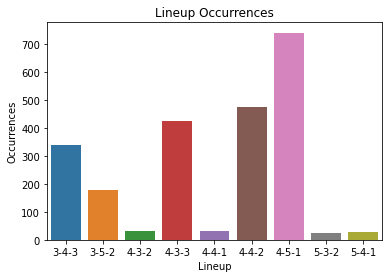

<Figure size 432x288 with 0 Axes>

In [93]:
# Plot the bar chart using seaborn
sns.barplot(x='lineup', y='occurrences', data=lineups_occurence)

# Add a title and labels to the plot
plt.title('Lineup Occurrences')
plt.xlabel('Lineup')
plt.ylabel('Occurrences')

# Show the plot
plt.show()
plt.savefig(os.path.join(VIS_PATH, "lineup_occurence.png"))

**NOTE:** It can be seen that teams prefer to play with a dense midfield. Also, it is also shown that midfielders play a vital role in the victory of a team. (shown in **Section 4**, file `02_exploratory_data_analysis.ipynb`

## Most effective lineups

### All three seasons

In [ ]:
df_lineups['away_result'] = np.where(df_lineups['home_result'] == 'win', 'lose',
                             np.where(df_lineups['home_result'] == 'lose', 'win', 'draw'))

In [ ]:
print(df_lineups.loc[:, ['home/lineup', 'home_result', 'away/lineup', 'away_result']].head(10))

  home/lineup home_result away/lineup away_result
0       4-5-1        lose       4-3-3         win
1       4-4-2         win       4-5-1        lose
2       4-3-3         win       4-5-1        lose
3       4-4-2         win       3-4-3        lose
4       4-5-1         win       4-5-1        lose
5       4-5-1        draw       3-5-2        draw
6       3-4-3        draw       3-5-2        draw
7       4-4-2        lose       3-4-3         win
8       4-4-2        draw       4-5-1        draw
9       3-5-2        lose       4-5-1         win


In [ ]:
print(list(set(['4-5-1', '4-4-2', '4-3-3', '3-4-3', '3-5-2', '5-4-1', '5-3-2','4-3-3', '4-5-1', '3-4-3', '3-5-2', '4-4-2', '4-4-1', '4-3-2'])))

['4-4-2', '4-3-3', '4-3-2', '3-4-3', '5-4-1', '4-5-1', '4-4-1', '5-3-2', '3-5-2']


In [ ]:
#df_loss_count
#df_wins_count
#df_draw_count
results = ['win', 'lose', 'draw']
lineups = ['4-3-2', '5-3-2', '5-4-1', '3-4-3', '3-5-2', '4-4-1', '4-4-2', '4-3-3', '4-5-1']

# create win_df, counting the number of matches win by each lineup
win_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'win':
        win_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'win':
        win_counts[row['away/lineup']] += 1

win_df = pd.DataFrame({'lineup': list(win_counts.keys()), 'count': list(win_counts.values())})

# create lose_df
lose_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'lose':
        lose_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'lose':
        lose_counts[row['away/lineup']] += 1

lose_df = pd.DataFrame({'lineup': list(lose_counts.keys()), 'count': list(lose_counts.values())})


# create draw_df
draw_counts = {lineup: 0 for lineup in lineups}

for index, row in df_lineups.iterrows():
    if row['home_result'] == 'draw':
        draw_counts[row['home/lineup']] += 1
    elif row['away_result'] == 'draw':
        draw_counts[row['away/lineup']] += 1

draw_df = pd.DataFrame({'lineup': list(draw_counts.keys()), 'count': list(draw_counts.values())})


In [ ]:
# outer join the three dataframes above
lineup_result = pd.merge(win_df, lose_df, on='lineup', how='outer')
lineup_result = pd.merge(lineup_result, draw_df, on='lineup', how='outer')
lineup_result = lineup_result.fillna(0)
lineup_result = lineup_result.rename(columns={'count_x': 'win', 'count_y': 'loss', 'count':'draw'})

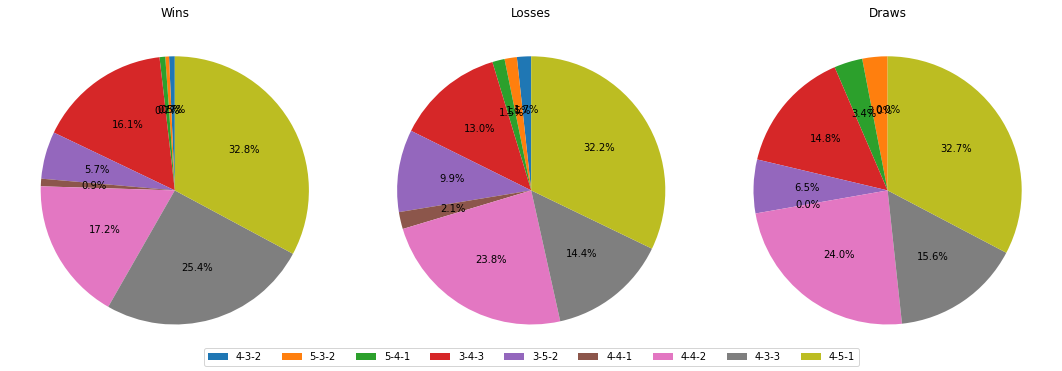

<Figure size 432x288 with 0 Axes>

In [ ]:
# Calculate total wins, losses, and draws
total_wins = lineup_result['win'].sum()
total_losses = lineup_result['loss'].sum()
total_draws = lineup_result['draw'].sum()

# Create pie charts for wins, losses, and draws
sizes_wins = lineup_result['win'] / total_wins
sizes_losses = lineup_result['loss'] / total_losses
sizes_draws = lineup_result['draw'] / total_draws

# Plot the pie charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(sizes_wins, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[0].set_title("Wins")

axs[1].pie(sizes_losses, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[1].set_title("Losses")

axs[2].pie(sizes_draws, labels=['' for i in range(len(lineup_result))], startangle=90, autopct='%1.1f%%')
axs[2].set_title("Draws")

plt.tight_layout()

# Create the legend
fig.legend(lineup_result['lineup'], loc='lower center', ncol=len(lineup_result))
plt.show()
plt.savefig(os.path.join(VIS_PATH, 'pie_chart_for_lineup_and_result.png'))

**NOTE:** It can be seen that the `4-5-1` lineup accounts for the highest portion in the total number of victories.